## Peer Grader Guidance
Please review the student expectations for peer review grading and peer review comments.  Overall, we ask that you score with accuracy. When grading your peers, you will not only learn how to improve your future homework submissions but you will also gain deeper understanding of the concepts in the assignments. When assigning scores, consider the responses to the questions given your understanding of the problem and using the solutions as a guide. Moreover, please give partial credit for a concerted effort, but also be thorough. **Add comments to your review, particularly when deducting points, to explain why the student missed the points.** Ensure your comments are specific to questions and the student responses in the assignment.

# Background

You have been contracted as a healthcare consulting company to understand the factors on which the pricing of health insurance depends. 

## Data Description

The data consists of a data frame with 1338 observations on the following 7 variables:

1. price: Response variable ($)
2. age: Quantitative variable
3. sex: Qualitative variable
4. bmi: Quantitative variable
5. children: Quantitative variable
6. smoker: Qualitative variable
7. region: Qualitative variable

## Instructions on reading the data

To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`

In [1]:
insurance = read.csv("insurance.csv", head = TRUE)

# Question 1: Exploratory Data Analysis [15 points]

a. **4 pts** Create scatterplots of the response, *price*, against three quantitative predictors *age*, *bmi*, and *children*. Describe the general trend (direction and form) of each plot. It should be 3 separate scatter plots.

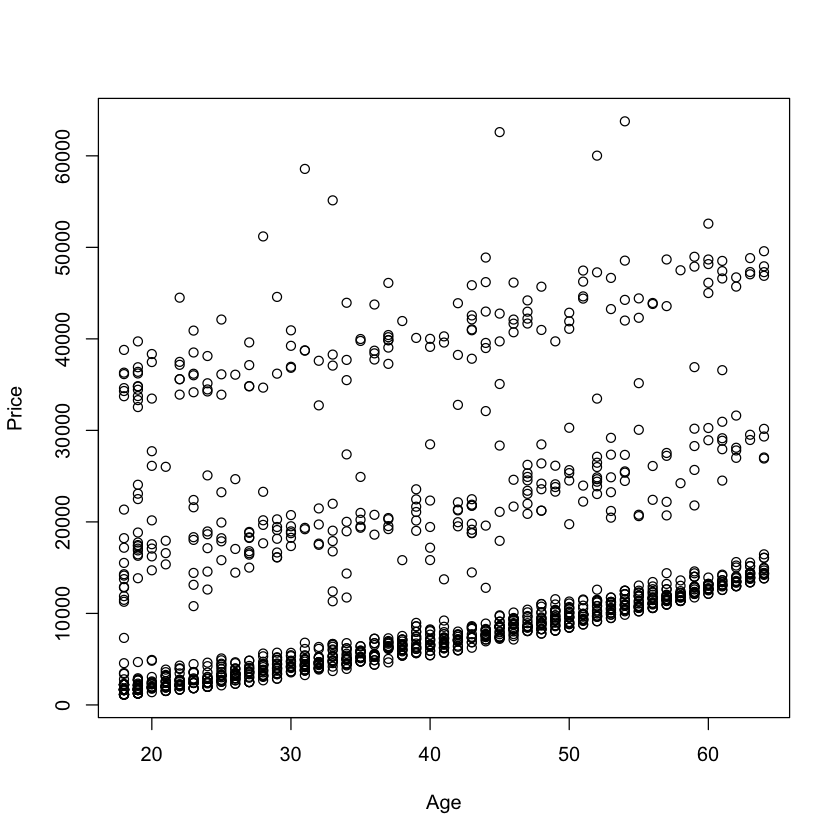

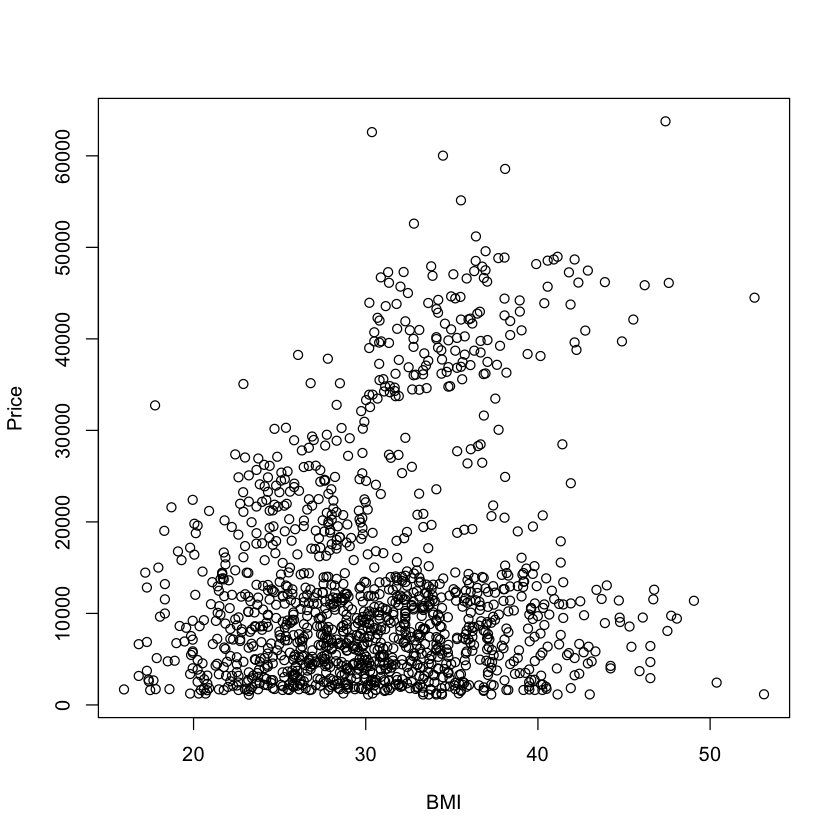

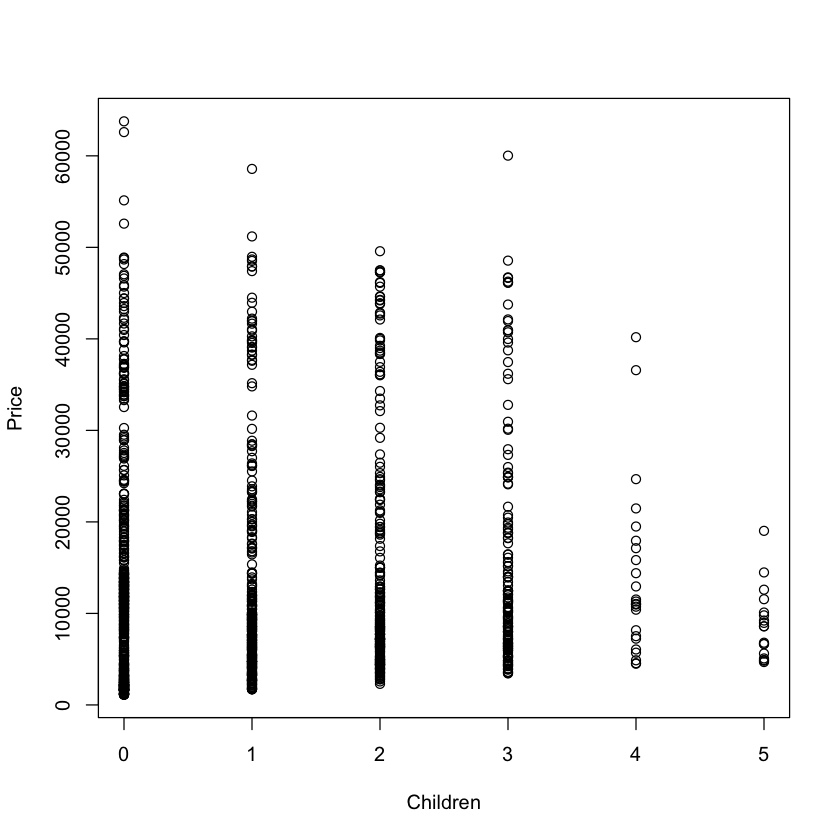

In [2]:
plot(insurance$age, insurance$price, xlab="Age", ylab="Price")

plot(insurance$bmi, insurance$price, xlab="BMI", ylab="Price")

plot(insurance$children, insurance$price, xlab="Children", ylab="Price")

The scatterplot showing price as a funciton of age displays a mainly linear relationship with quite a few outliers thorughout the dataset. The general relationship shows as age increase the price increases as well.

The BMI vs price scatterplot shows a lot of scatter in the data. In general as BMI increases the price also increases.

The price as a function of number of children does not show a strong relationship. It seems that a higher number of children leads to decreasing price.

b. **4 pts** What is the value of the correlation coefficient for each of the above pair of response and predictor variables? What does it tell you about your comments in part (a)?

In [3]:
paste("Correlation coefficient betwee price and age:", round(cor(insurance$age, insurance$price), 3))

paste("Correlation coefficient betwee price and bmi:", round(cor(insurance$bmi, insurance$price), 3))

paste("Correlation coefficient betwee price and children:", round(cor(insurance$children, insurance$price), 3))

[1] "Correlation coefficient betwee price and age: 0.299"

[1] "Correlation coefficient betwee price and bmi: 0.198"

[1] "Correlation coefficient betwee price and children: 0.068"

The correlation coefficient betwen price and age is the highest as expected from the scatter plot analysis. BMI and price has the next highest coefficient displaying a moderate amount of positive linearity. This reinforces that there is some positive relationship but not as high as price and age.

There is little correlation between price and children as displayed in a low correlation coefficient. This reinforces the observation that little relationship exists in the scatter plot.

c. **4 pts** Create box plots of the response, *price*, and the three qualitative predictors *sex*, *smoker*, and *region*. Based on these box plots, does there appear to be a relationship between these qualitative predictors and the response?

*Hint*: Use the given code to convert the qualitative predictors to factors.

In [4]:
#make categorical variables into factors
insurance$sex<-as.factor(insurance$sex) #makes female the baseline level
insurance$smoker<-as.factor(insurance$smoker) #makes no the baseline level
insurance$region<-as.factor(insurance$region) #makes northeast the baseline level

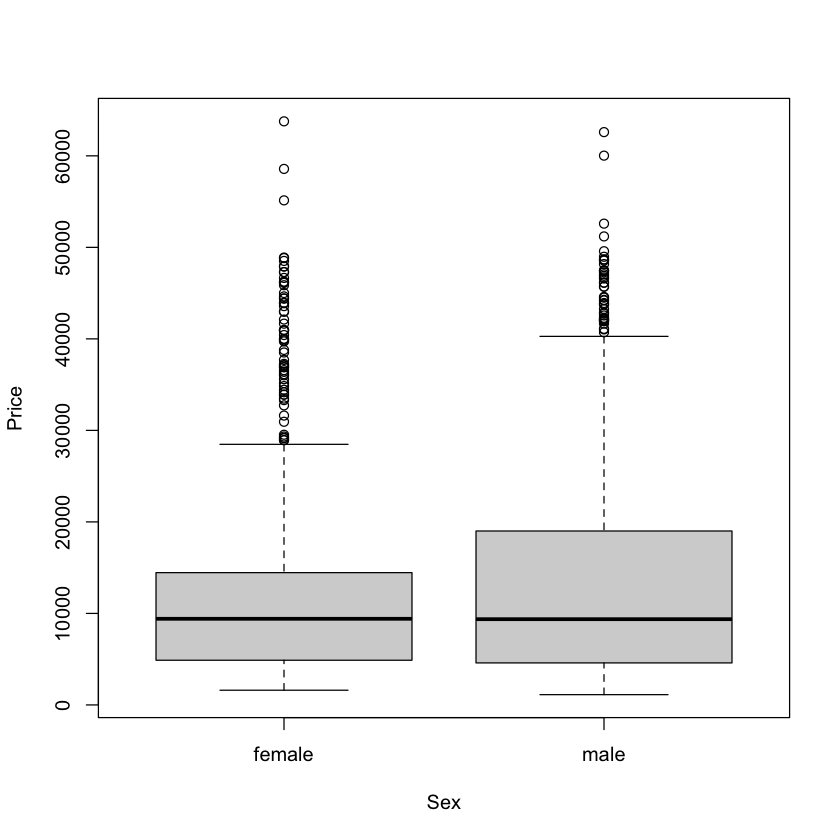

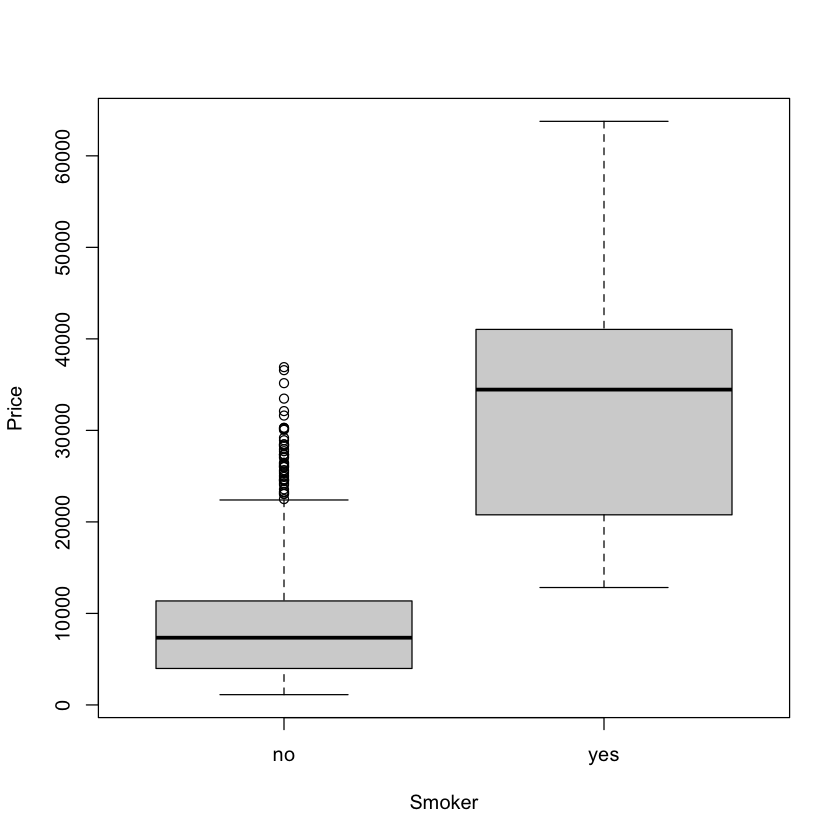

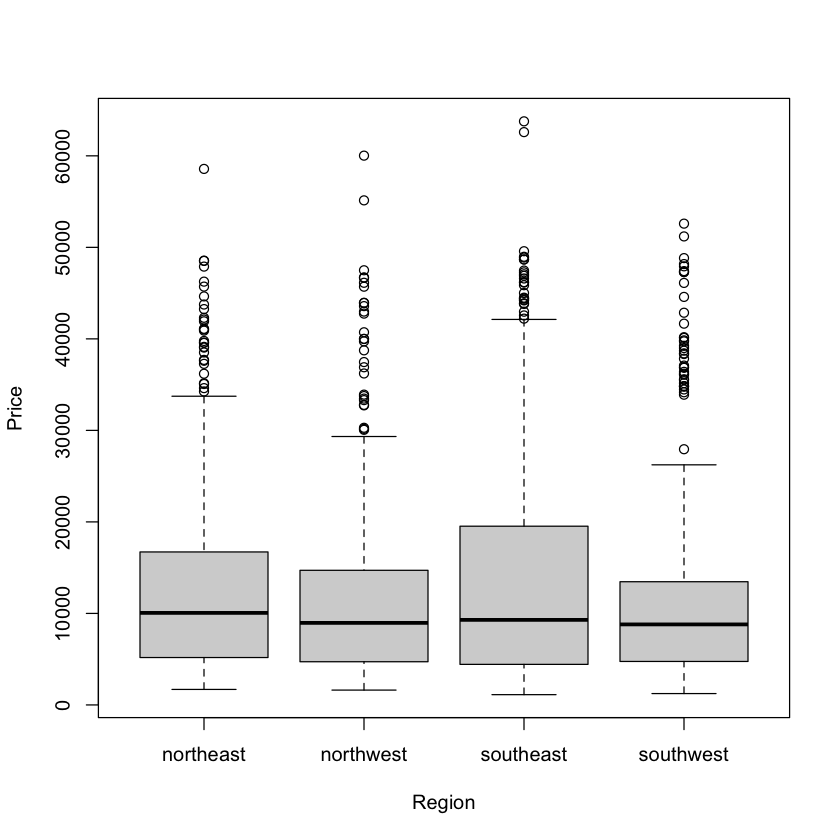

In [5]:
boxplot(price~sex,data=insurance, xlab="Sex", ylab="Price")
boxplot(price~smoker,data=insurance, xlab="Smoker", ylab="Price")
boxplot(price~region,data=insurance, xlab="Region", ylab="Price")

The mean seems to be the same between female and male groups therefore there doesn not seem to be a relationship between sex and price.

The mean does seem to be different between smokers and non-smokers. Therefore, there does seem to be a relationship between smoker status and price.

The mean does not seem to be different between regions. Therefore, there does not seem to be a relationship between region and price.

d. **3 pts** Based on the analysis above, does it make sense to run a multiple linear regression with all of the predictors?

Yes it makes sense to run a multiple linear regression analysis with all of the predictors. Some predictors need more investigation within the scope of the multiple linear regression model.

# Question 2: Fitting the Multiple Linear Regression Model [12 points]

Build a multiple linear regression model, named *model1*, using the response, *price*, and all 6 predictors, and then answer the questions that follow:

a. **6 pts** Report the coefficient of determination (R-squared) for the model and give a concise interpretation of this value.

In [6]:
model1 <- lm(price~age + bmi + children + sex + smoker + region, data=insurance)

summary(model1)

paste("The reported r-squared is", round(summary(model1)$r.squared, 3))


Call:
lm(formula = price ~ age + bmi + children + sex + smoker + region, 
    data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
sexmale           -131.3      332.9  -0.394 0.693348    
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 132

[1] "The reported r-squared is 0.751"

The r-squared of 0.751 indicates that 75.1% of the variance in the data is explained by the model.

b. **6 pts** Is the model of any use in predicting price? Using $\alpha = 0.05$, provide the following elements of the test of overall regression of the model: null hypothesis $H_0$, alternative hypothesis $H_a$, $F$-statistic or $p$-value, and conclusion.

$H_0$: All of the slope coefficients are equal to 0.
$H_a$: At least one of the slope coefficients is not equal to 0.
$p$-value: The p-value is < 2.2e-16

The p-value is less than $\alpha = 0.05$. Therefore, we can reject the null hypothesis and determine that at least one of the slope coefficients are non-zero.

This indicates that the model is somewhat useful at predicting the price.

# Question 3: Model Comparison [14 points]

a. **5 pts** Assuming a marginal relationship between *region* and *price*, perform an ANOVA $F$-test on the mean insurance prices among the different regions. Using an $\alpha$-level of 0.05, can we reject the null hypothesis that the means of the regions are equal? Please interpret.

In [7]:
model_regionprice <- aov(price~region, data = insurance)
summary(model_regionprice)

              Df    Sum Sq   Mean Sq F value Pr(>F)  
region         3 1.301e+09 433586560    2.97 0.0309 *
Residuals   1334 1.948e+11 146007093                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In the model the p-value of the region predicor is 0.0309 which is less than the $\alpha$-level of 0.05. Therefore, we can reject the null hypothesis that all of the mean prices are equal.

b. **5 pts** Now, build a second multiple linear regression model, called *model2*, using *price* as the response variable, and all variables except *region* as the predictors. Conduct a partial $F$-test comparing *model2* with *model1*. What is the partial-F test p-value? Can we reject the null hypothesis that the regression coefficients for *region* variables are zero at an $\alpha$-level of 0.05?

In [8]:
model2 <- lm(price~age + bmi + children + sex + smoker, data=insurance)

summary(model2)

anova(model2, model1)


Call:
lm(formula = price ~ age + bmi + children + sex + smoker, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11837.2  -2916.7   -994.2   1375.3  29565.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12052.46     951.26 -12.670  < 2e-16 ***
age            257.73      11.90  21.651  < 2e-16 ***
bmi            322.36      27.42  11.757  < 2e-16 ***
children       474.41     137.86   3.441 0.000597 ***
sexmale       -128.64     333.36  -0.386 0.699641    
smokeryes    23823.39     412.52  57.750  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6070 on 1332 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7488 
F-statistic:   798 on 5 and 1332 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1332,49072964053,NA,NA,NA,NA
2,1329,48839532844,3,233431209,2.117343,0.09622108


Through comparison of the two models through the partial f-test we found that the p-value is 0.096 which is greater than the $\alpha$-level of 0.05. Therefore we fail to reject the null hypothesis that the regression coefficients for the region variable are 0.

c. **4 pts** What can you conclude from 3a and 3b? Do they provide the exact same results?

Throught the marginal test in Part A we conclude that the mean insurance prices are not the same across the different regions. However, in Part B we concluded that the coefficient of the region variable whilei including all other variables could not be statistically proven to not be equal to 0.

No, I would not expect the models (model1 and model2) to produce the exact same results. 

*Note: Please use model1 for all of the following questions.*

# Question 4: Coefficient Interpretation [7 points]

a. **3 pts** Interpret the estimated coefficient of *sexmale* in the context of the problem. *Make sure female is the baseline level for sex. Mention any assumptions you make about other predictors clearly when stating the interpretation.*

The sexmale coefficient is -131.3 indicates insurance prices are $131.90 cheaper when the client is male while holding all other predictors constant.

b. **4 pts** If the value of the *bmi* in *model1* is increased by 0.01 and the other predictors are kept constant, what change in the response would be expected?

The coefficent estimate for 1 unit of BMI is 339.2. Therefore by increasing BMI by 0.01 the insurance prices are expected to rise by $3.39 keeping all other predictors constant.

# Question 5: Confidence and Prediction Intervals [12 points]

a. **6 pts** Compute 90% and 95% confidence intervals (CIs) for the parameter associated with *age* for *model1*. What observations can you make about the width of these intervals?

In [10]:
confint(model1, "age", level=0.90)
confint(model1, "age", level=0.95)

,5 %,95 %
age,237.2708,276.4419


,2.5 %,97.5 %
age,233.5138,280.1989


For each of the confidence levels tested above the age coefficient does not include 0. Therefore it is expected to have explanatory power.

The range of the confidence interval is larger for the higher confidence interval, as is expected. To gain a higher level of confidence the range of the confidence interval must increase. 

b. **3 pts** Using *model1*, estimate the average price for all insurance policies with the same characteristics as the first data point in the sample. What is the 95% confidence interval? Provide an interpretation of your results.

In [25]:
newdata = insurance[1,]
newdata = subset(newdata, select = -c(price) )

predict(model1, newdata, interval = "confidence")

,age,sex,bmi,children,smoker,region
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>
1,19,female,27.9,0,yes,southwest


,fit,lwr,upr
1,25293.71,24143.98,26443.44


The 95% confidence interval is shown above when predicting using the same characteritics as the first person in the data set. This reports the 95% confidence interval for average insurance prices for this individual are between \\$25144 and \\$26443 with the predicted value at \\$25294.

c. **3 pts** Suppose that the *age* value for the first data point is increased to 50, while all other values are kept fixed. Using *model1*, predict the price of an insurance policy with these characteristics. What is the 95% prediction interval? Provide an interpretation of your results.

In [28]:
newdata = insurance[1,]
newdata["age"] = 50
newdata = subset(newdata, select = -c(price) )
predict(model1, newdata, interval = "predict")

,fit,lwr,upr
1,33256.26,21313.29,45199.23


The prediction interval after changing the age of the first data point to 50 is shown above. The range of the prediction interval is significantly larger than the range of the confidence interval, as is expected.Furter the fitted value of the prediction interval is larger than the fitted value when the age is lower. This is expected through interpretation of the model coefficient which indicated that the average insurance price would rise with increasing age, keeping all other predictors constant.